In [19]:
import pandas as pd
import matplotlib.pyplot as plt


df=pd.read_csv("01 renewable-share-energy.csv")

df.describe()


,Year,Renewables (% equivalent primary energy)
count,5603.000000,5603.000000
mean,1993.800821,10.735585
std,16.283556,12.923945
min,1965.000000,0.000000
25%,1980.000000,1.980135
50%,1994.000000,6.522184
75%,2008.000000,14.099622
max,2021.000000,86.874535


In [11]:
df.isnull().sum()
df= df.dropna()

In [13]:
df.isnull().sum()

Entity                                      0
Code                                        0
Year                                        0
Renewables (% equivalent primary energy)    0
dtype: int64

In [14]:
df.head()

,Entity,Code,Year,Renewables (% equivalent primary energy)
114,Algeria,DZA,1965,4.763068
115,Algeria,DZA,1966,3.518747
116,Algeria,DZA,1967,4.291954
117,Algeria,DZA,1968,5.486195
118,Algeria,DZA,1969,3.182764


In [23]:
df.columns = ['Country', 'Code', 'Year', 'Renewable_Share']
df.head()


,Country,Code,Year,Renewable_Share
114,Algeria,DZA,1965,4.763068
115,Algeria,DZA,1966,3.518747
116,Algeria,DZA,1967,4.291954
117,Algeria,DZA,1968,5.486195
118,Algeria,DZA,1969,3.182764


In [24]:
df = df.dropna().copy()      
df['Year'] = df['Year'].astype(int)



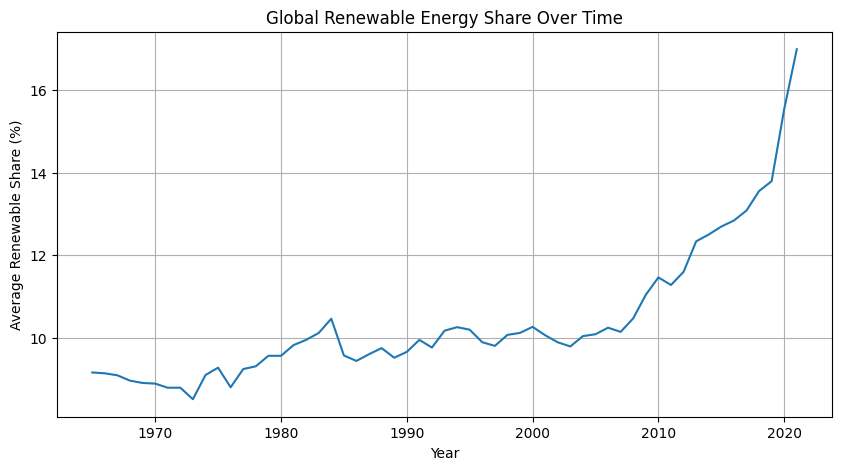

In [26]:
trend = df.groupby('Year')['Renewable_Share'].mean()

plt.figure(figsize=(10,5))
plt.plot(trend.index, trend.values)
plt.title('Global Renewable Energy Share Over Time')
plt.xlabel('Year')
plt.ylabel('Average Renewable Share (%)')
plt.grid(True)
plt.show()

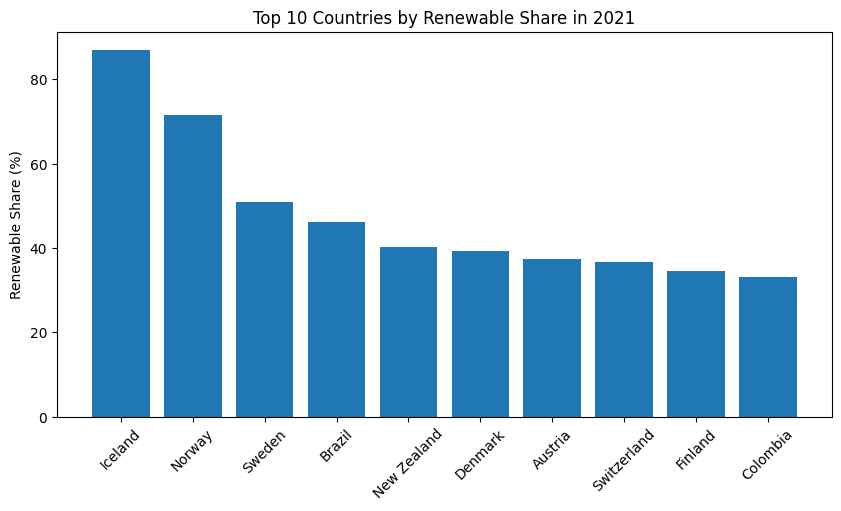

In [28]:
latest_year = df['Year'].max()
top10 = df[df['Year'] == latest_year].sort_values(by='Renewable_Share', ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(top10['Country'], top10['Renewable_Share'])
plt.xticks(rotation=45)
plt.title(f'Top 10 Countries by Renewable Share in {latest_year}')
plt.ylabel('Renewable Share (%)')
plt.show()

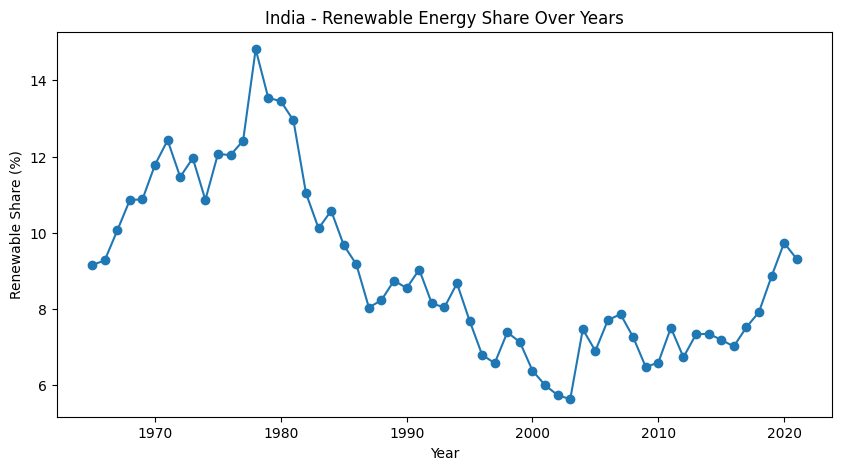

In [31]:
country = "India"
india = df[df['Country'] == country]

plt.figure(figsize=(10,5))
plt.plot(india['Year'], india['Renewable_Share'], marker='o')
plt.title(f'{country} - Renewable Energy Share Over Years')
plt.xlabel('Year')
plt.ylabel('Renewable Share (%)')
plt.show()

In [34]:
df.to_csv("cleaned_renewable_data.csv", index=False)

In [60]:
from sklearn.linear_model import LinearRegression
import numpy as np
india = df[df['Country'] == 'India'].copy()
india.head()

,Country,Code,Year,Renewable_Share
2131,India,IND,1965,9.149455
2132,India,IND,1966,9.270712
2133,India,IND,1967,10.058605
2134,India,IND,1968,10.857532
2135,India,IND,1969,10.873967


In [62]:
india = india[india['Year'] >= 2000]

print(india.dtypes)
print(india['Renewable_Share'].unique()[:10])


Country             object
Code                object
Year                 int64
Renewable_Share    float64
dtype: object
[6.3762894 5.9925246 5.731832  5.6240616 7.460849  6.8943167 7.7062397
 7.8556447 7.2570653 6.4735703]


In [63]:
india['Renewable_Share'] = pd.to_numeric(india['Renewable_Share'], errors='coerce')
india = india.dropna(subset=['Renewable_Share'])


In [64]:
X = india[['Year']] 
y = india['Renewable_Share']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [65]:
future_years = np.array(range(2025, 2030)).reshape(-1, 1)

future_pred = model.predict(future_years)

future_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted_Renewable_Share': future_pred})

print(future_df)

   Year  Predicted_Renewable_Share
0  2025                   9.055509
1  2026                   9.177300
2  2027                   9.299091
3  2028                   9.420882
4  2029                   9.542673


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [68]:
future_years = pd.DataFrame({'Year': range(2025, 2035)})

future_pred = model.predict(future_years)

future_df = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted_Renewable_Share': future_pred
})

print(future_df)



   Year  Predicted_Renewable_Share
0  2025                   9.055509
1  2026                   9.177300
2  2027                   9.299091
3  2028                   9.420882
4  2029                   9.542673
5  2030                   9.664464
6  2031                   9.786255
7  2032                   9.908045
8  2033                  10.029836
9  2034                  10.151627


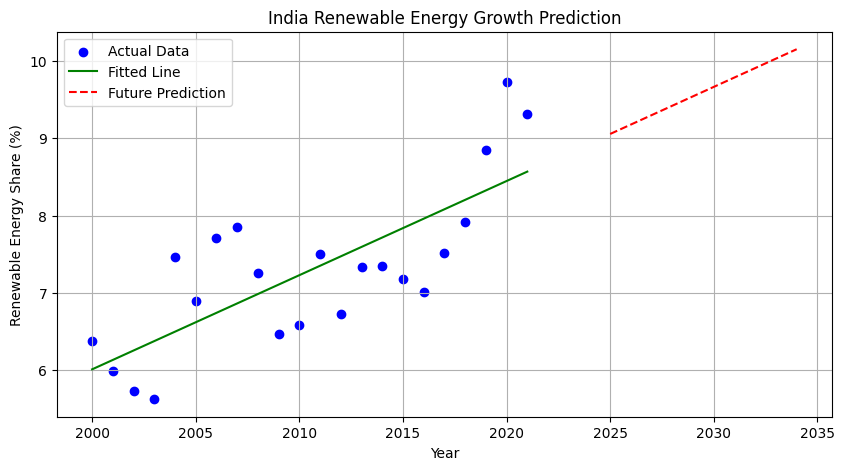

In [69]:
plt.figure(figsize=(10,5))

# Actual data
plt.scatter(X, y, color='blue', label='Actual Data')

plt.plot(X, model.predict(X), color='green', label='Fitted Line')

# Future predictions
plt.plot(future_years, future_pred, color='red', linestyle='--', label='Future Prediction')
# plt.scatter(future_years, future_pred, color='red', linestyle='--', label='Future Prediction')

plt.title('India Renewable Energy Growth Prediction')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Share (%)')
plt.legend()
plt.grid(True)
plt.show()